<a href="https://colab.research.google.com/github/SDineshKumar1304/DataScience_Projects/blob/main/DataScience_project_task_one_for_Sentiment_Analysis_on_social_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary Libraries

In [79]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


# Reading the csv File

In [80]:
# Load your dataset (replace 'your_data.csv' with your file path)
df = pd.read_csv("/content/Tweets.csv" )
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Identifying the Columns in the dataset:

In [81]:
print(df.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


# Removing the Duplicate values to clean the data

In [82]:
pip install pandas nltk beautifulsoup4


In [83]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer



# Assuming your dataset is stored in a DataFrame named 'df'
# Assuming the text column is named 'text'

# Display the first few rows of the dataset
print("Before Text Cleaning:")
print(df['text'].head())

# Function to clean text
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Removing HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Removing punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Removing numbers
    text = ''.join([i for i in text if not i.isdigit()])

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word.lower() not in stop_words])

    # Handling special characters
    text = ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])

    return text



Before Text Cleaning:
0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object


In [89]:
# Apply text cleaning to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the first few rows of the cleaned dataset
print("\nAfter Text Cleaning:")
print(df['cleaned_text'].head())

<ipython-input-88-3df14465b6a8>:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()



After Text Cleaning:
0                          virginamerica dhepburn said
1    virginamerica plus youve added commercial expe...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: cleaned_text, dtype: object


# Splitting the data into features


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming your cleaned text data is in the 'cleaned_text' column
X = df['cleaned_text']
y = df['airline_sentiment']  # Assuming the target variable is 'airline_sentiment'



# **Splitting the Dataset for Trainning and Testing**

In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#  Converting the text data into numerical vectors using the TF-IDF (Term Frequency-Inverse Document Frequency) representation

In [92]:
# Convert the text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)




#  Training a Multinomial Naive Bayes Model for Text Classification
         
    Training a Multinomial Naive Bayes (NB) model involves using a set of labeled data ,to teach the model how to make
    predictions. Specifically, the Multinomial Naive Bayes algorithm is a probabilistic classification algorithm that's
    commonly used for text classification tasks, like sentiment analysis.

In [93]:
# Initialize and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)



MultinomialNB()

# Evaluating the model's Performance

In [94]:
# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 77.90%
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      1889
     neutral       0.70      0.37      0.48       580
    positive       0.82      0.55      0.66       459

    accuracy                           0.78      2928
   macro avg       0.77      0.62      0.67      2928
weighted avg       0.77      0.78      0.76      2928



# Since it Achieved 77.9% ,to improve my model Performance I have to Fine   Tune it


# Importing the necessary libraries for Fine Tuning

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import pandas as pd



# Splitting the dataset into trainning and testing sets

In [96]:
# Define a range of alpha values to search
alphas = [0.1, 0.5, 1.0, 1.5, 2.0]

# **Performing grid search with cross validation to get the best parameters:**

In [97]:
# Perform grid search with cross-validation
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

#  Defining the hyperparameter grid (tfidf) and smoothing paramater (alpha) for tuning:

In [99]:
# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Retraining the best_model to improve performance performance

In [100]:
# Train a new model with the best hyperparameters
model_tuned = MultinomialNB(alpha=best_alpha)
model_tuned.fit(X_train_vectorized, y_train)


MultinomialNB(alpha=0.5)

# Using the retrained best_model to check its performance with new data and also identifying the mismatched instances

In [101]:
# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']



# Tuned model performance increased to 79%

In [102]:

# Make predictions on the test set
y_pred_tuned = model_tuned.predict(X_test_vectorized)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned * 100:.2f}%")
print(classification_report(y_test, y_pred_tuned))

Tuned Model Accuracy: 79.47%
              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1889
     neutral       0.66      0.45      0.53       580
    positive       0.79      0.64      0.71       459

    accuracy                           0.79      2928
   macro avg       0.76      0.67      0.71      2928
weighted avg       0.78      0.79      0.78      2928



# Displaying the best Hayperparameters

In [105]:
# Display the best parameters
print("Best Hyperparameters:")
print(best_alpha)


Best Hyperparameters:
0.5


# Creating the new pipeline :
The goal is to have a model (best_pipeline) that has been trained on the entire dataset with the hyperparameters tuned for optimal performance, ready for use in making predictions on new, unseen data.

# Making new Prediction based on the model's performance

Predicted Sentiment Distribution:
negative    2166
neutral      392
positive     370
dtype: int64


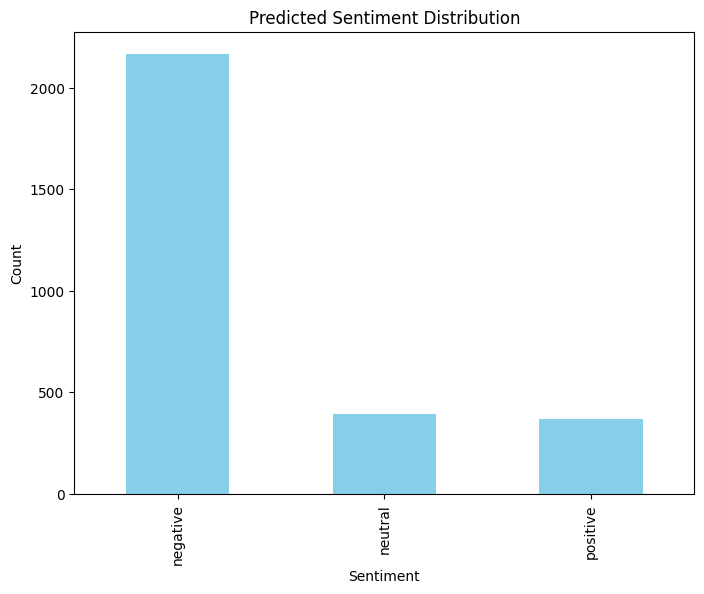

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_pred_tuned is the variable containing predicted sentiments
# Replace it with the actual variable name in your code

# Display the distribution
print("Predicted Sentiment Distribution:")
print(pd.Series(y_pred_tuned).value_counts())

# Plot the distribution
plt.figure(figsize=(8, 6))
pd.Series(y_pred_tuned).value_counts().plot(kind='bar', color='skyblue')
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Saving the Tuned Model in .pkl format

In [107]:
# Save the updated model and parameters
import joblib

# Save the model
joblib.dump(model, 'best_model_updated.pkl')

# Save the best hyperparameters
joblib.dump(best_alpha, 'best_hyperparameters_updated.pkl')


['best_hyperparameters_updated.pkl']

# Loading the Best_hyperparameters

In [109]:
# Load the best hyperparameters
loaded_best_params = joblib.load('best_hyperparameters_updated.pkl')

# Print or use the loaded hyperparameters
print("Loaded Best Hyperparameters:", loaded_best_params)


Loaded Best Hyperparameters: 0.5


# Visualizing the models Performance by using various Visual Aids:

In [110]:
print(df.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'cleaned_text'],
      dtype='object')


Predicted Sentiment Distribution:
negative    2166
neutral      392
positive     370
dtype: int64


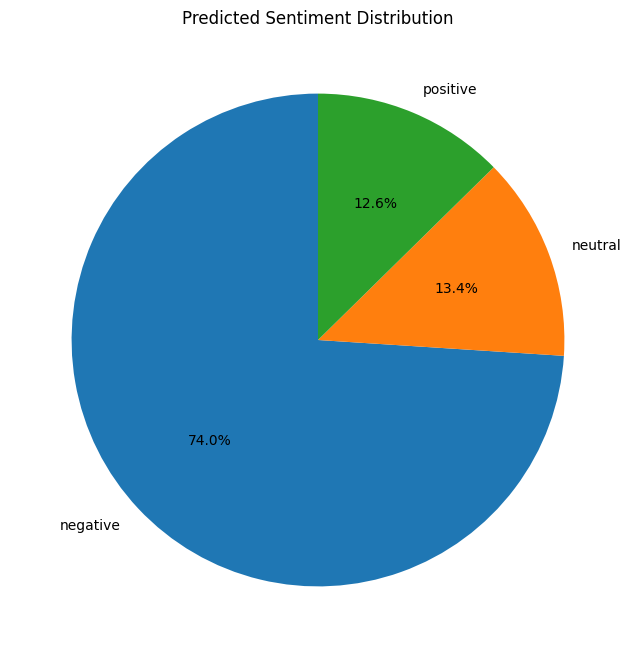

In [111]:

# Display the distribution
print("Predicted Sentiment Distribution:")
print(pd.Series(y_pred_tuned).value_counts())

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pd.Series(y_pred_tuned).value_counts(), labels=pd.Series(y_pred_tuned).value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Predicted Sentiment Distribution')
plt.show()

In [112]:
# Display the column names in your DataFrame
print(df.columns)


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'cleaned_text'],
      dtype='object')


In [113]:
# Extract misclassified instances
misclassified_indices = df[df['cleaned_text'] != df['airline_sentiment']].index
misclassified_instances = df.loc[misclassified_indices, ['text', 'airline_sentiment', 'cleaned_text']]

# Display a sample of misclassified instances
print("Misclassified Instances:")
print(misclassified_instances.sample(5))


Misclassified Instances:
                                                    text airline_sentiment  \
4730   @SouthwestAir : Hello..are flights taking off ...           neutral   
7440   @JetBlue is your partnership with Hawaiian liv...           neutral   
5319   @SouthwestAir is really gonna hear my mouth ab...          negative   
5059   @SouthwestAir great example of customer servic...          positive   
14589  @AmericanAir I've been trying for 4 hours to g...          negative   

                                            cleaned_text  
4730   southwestair helloare flight taking dallaslove...  
7440   jetblue partnership hawaiian live earn hawaiia...  
5319   southwestair really gon na hear mouth bag situ...  
5059   southwestair great example customer service mo...  
14589       americanair ive trying hour get hold someone  


# **ReTesting The Model That is Tuned and it achieved 85.83%**

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a separate test set for evaluation
# Split the data into features (X_test) and labels (y_test)
X_test_text = df['cleaned_text']
y_test = df['airline_sentiment']

# Use the same TF-IDF vectorizer as used during training
X_test_vectorized = vectorizer.transform(X_test_text)

# Make predictions on the test set using the fine-tuned model
test_predictions = model_tuned.predict(X_test_vectorized)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracy
print("Test Set Accuracy:", test_accuracy)

# Print the accuracy as a formatted percentage
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")

# Print the classification report for more detailed evaluation
print("\nClassification Report for Test Set:\n", classification_report(y_test, test_predictions))


Test Set Accuracy: 0.8583333333333333
Test Set Accuracy: 85.83%

Classification Report for Test Set:
               precision    recall  f1-score   support

    negative       0.87      0.95      0.91      9178
     neutral       0.82      0.64      0.72      3099
    positive       0.86      0.78      0.82      2363

    accuracy                           0.86     14640
   macro avg       0.85      0.79      0.81     14640
weighted avg       0.86      0.86      0.85     14640



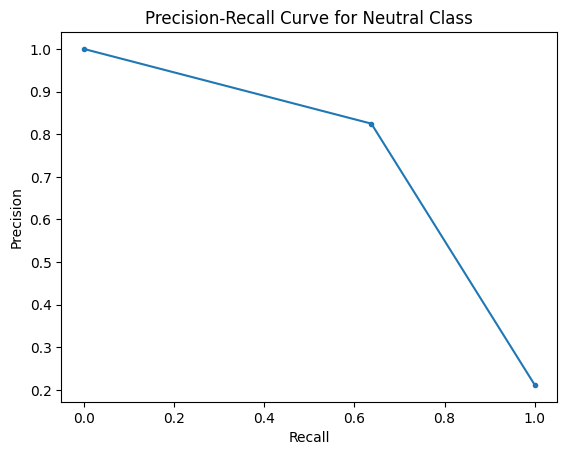

In [132]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get precision and recall values
precision, recall, _ = precision_recall_curve(y_test == 'neutral', test_predictions == 'neutral')

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Neutral Class')
plt.show()


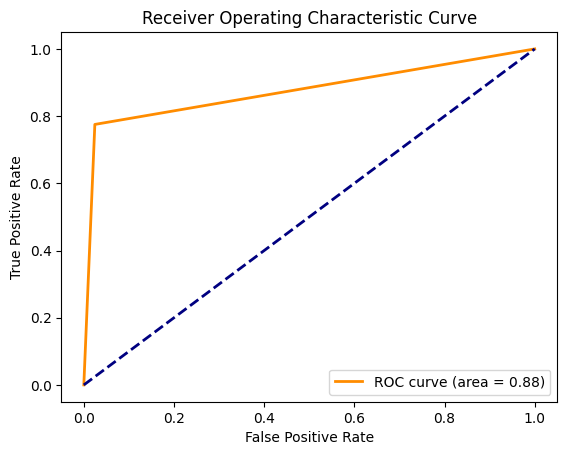

In [134]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming binary classification (positive vs. not positive)
fpr, tpr, _ = roc_curve(y_test == 'positive', test_predictions == 'positive')
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


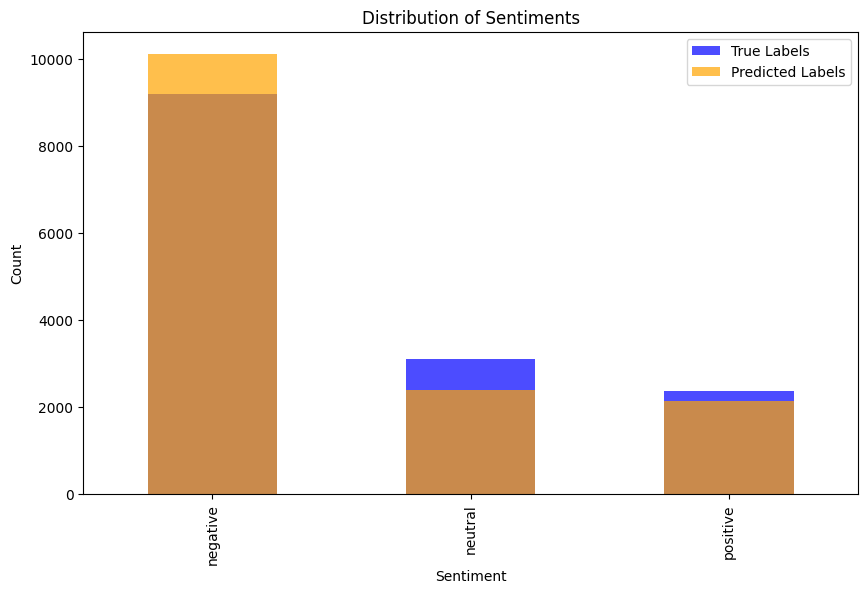

In [136]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment in true labels and predicted labels
true_sentiment_counts = y_test.value_counts()
predicted_sentiment_counts = pd.Series(test_predictions).value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
true_sentiment_counts.plot(kind='bar', color='blue', alpha=0.7, label='True Labels')
predicted_sentiment_counts.plot(kind='bar', color='orange', alpha=0.7, label='Predicted Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

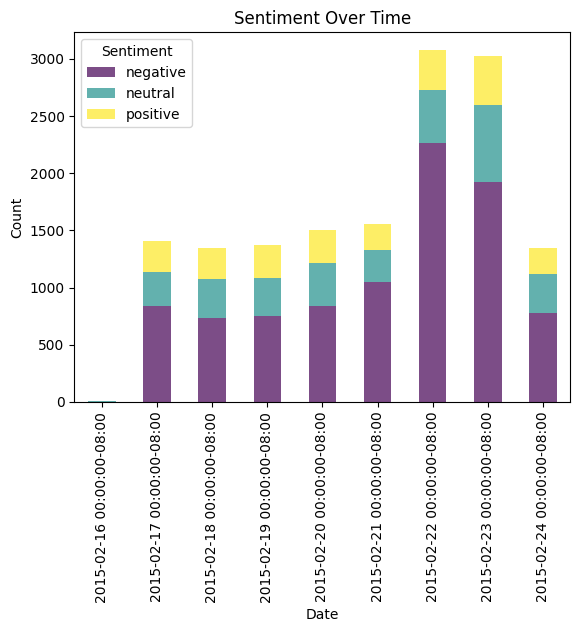

In [137]:
# Assuming 'df' is your DataFrame with a 'tweet_created' column
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Resample data by day and count sentiment occurrences
sentiment_over_time = df.resample('D', on='tweet_created')['airline_sentiment'].value_counts().unstack()

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.7)
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


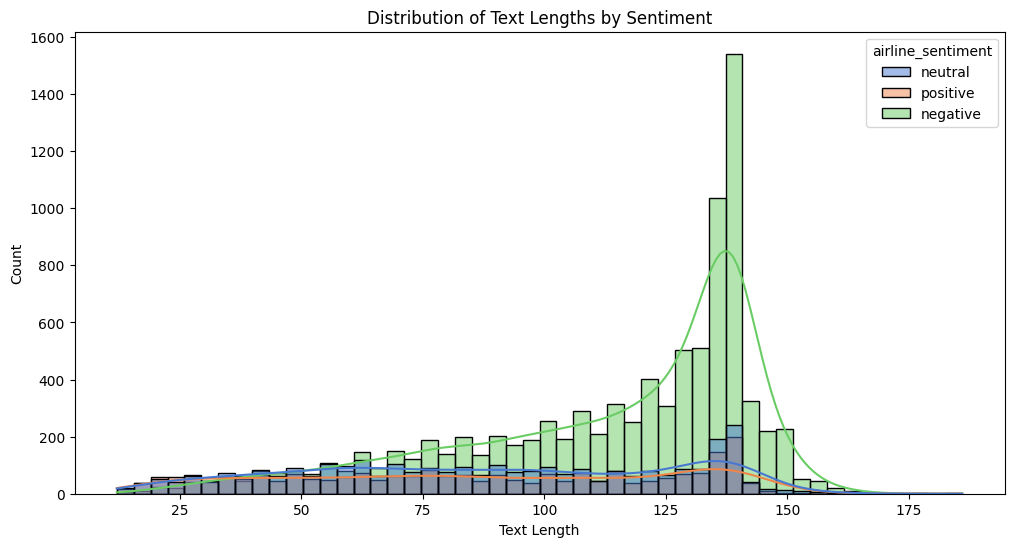

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with a 'text' column
df['text_length'] = df['text'].apply(len)

# Assuming 'df' is your DataFrame with 'text_length' and 'airline_sentiment' columns
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='airline_sentiment', kde=True, bins=50, palette='muted')
plt.title('Distribution of Text Lengths by Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


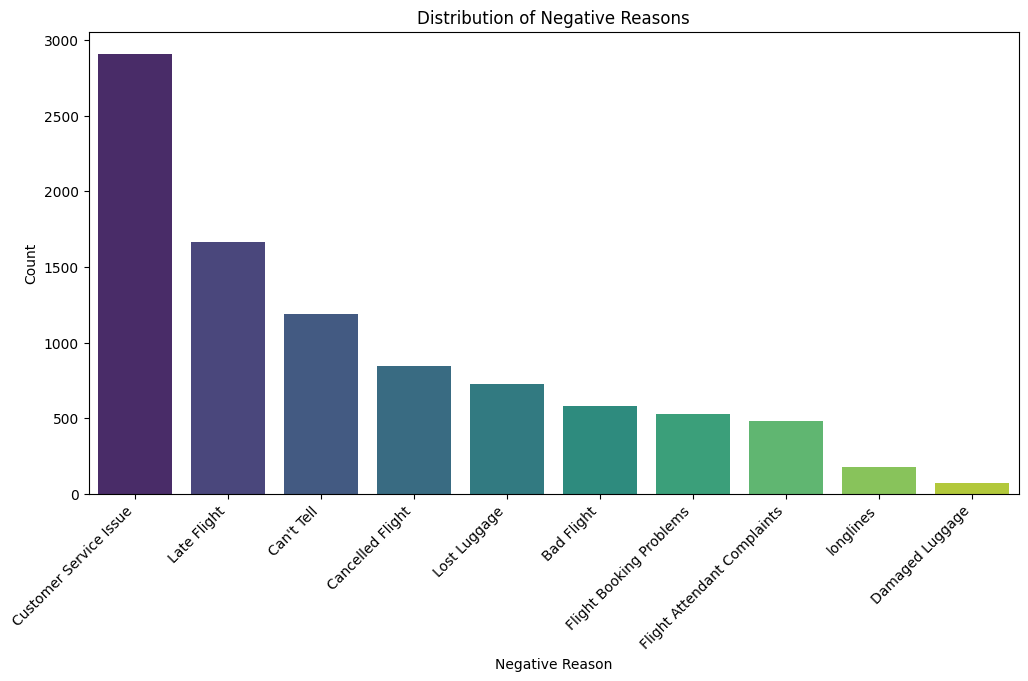

In [139]:
# Assuming 'df' is your DataFrame with 'negativereason' column
plt.figure(figsize=(12, 6))
sns.countplot(x='negativereason', data=df, order=df['negativereason'].value_counts().index, palette='viridis')
plt.title('Distribution of Negative Reasons')
plt.xlabel('Negative Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


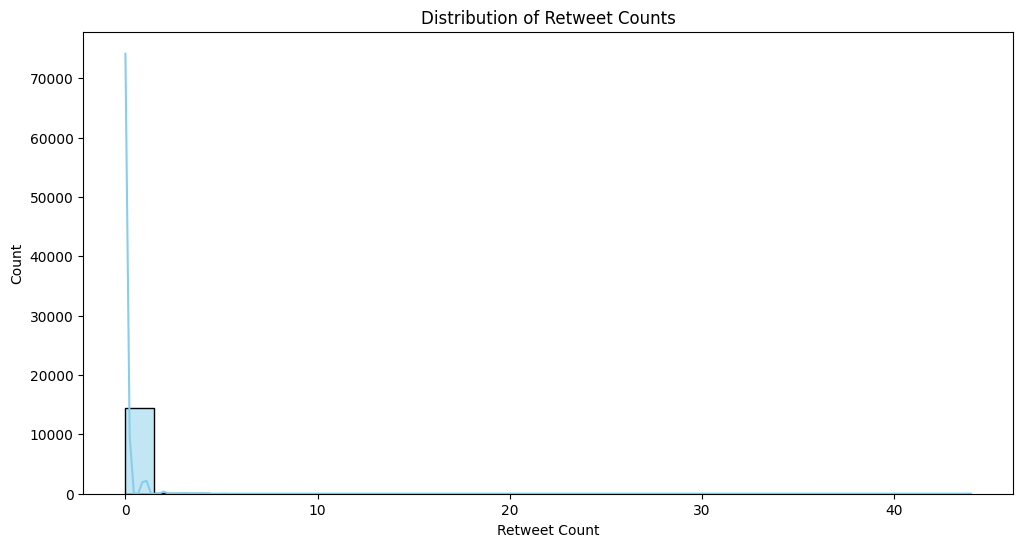

In [140]:
# Assuming 'df' is your DataFrame with 'retweet_count' column
plt.figure(figsize=(12, 6))
sns.histplot(df['retweet_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Count')
plt.show()


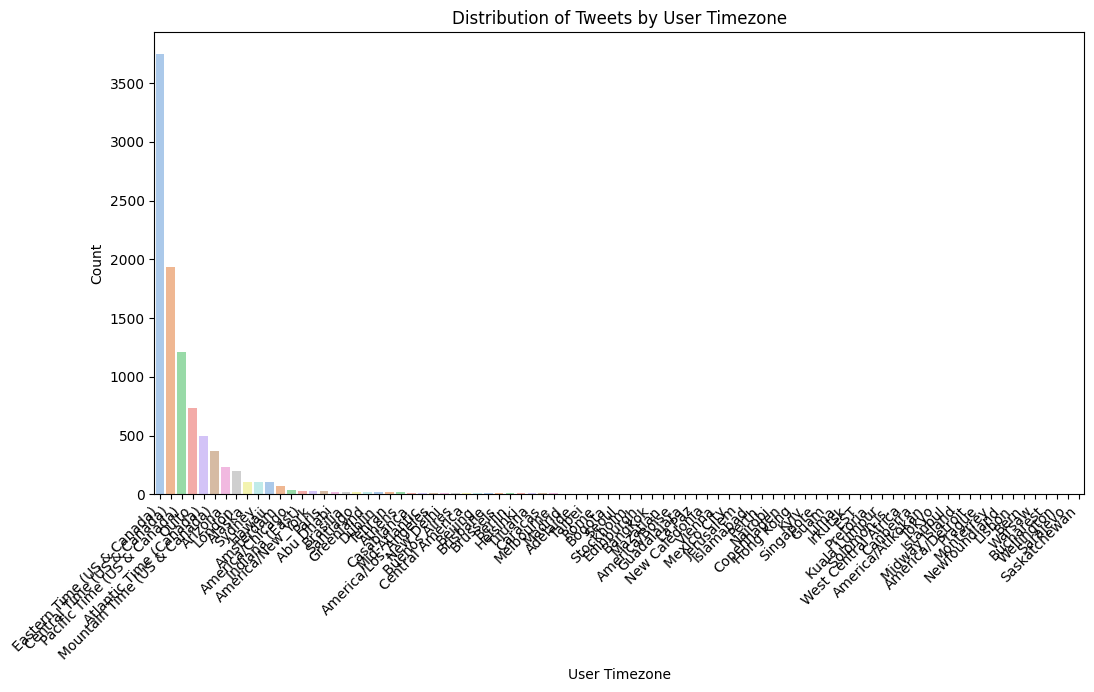

In [141]:
# Assuming 'df' is your DataFrame with 'user_timezone' column
plt.figure(figsize=(12, 6))
sns.countplot(x='user_timezone', data=df, order=df['user_timezone'].value_counts().index, palette='pastel')
plt.title('Distribution of Tweets by User Timezone')
plt.xlabel('User Timezone')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


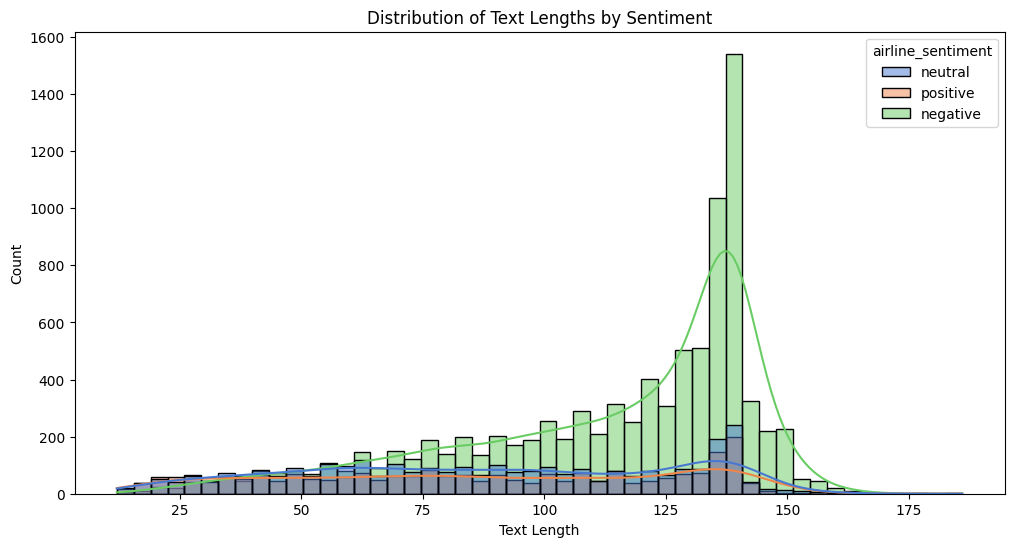

In [142]:
# Assuming 'df' is your DataFrame with 'text' and 'airline_sentiment' columns
df['text_length'] = df['text'].apply(len)
# Assuming 'df' is your DataFrame with 'text_length' and 'airline_sentiment' columns
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='airline_sentiment', kde=True, bins=50, palette='muted')
plt.title('Distribution of Text Lengths by Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


In [143]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 76.2 MB/s eta 0:00:00


In [144]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output


# Interactive dashboard Building  

run this code in jupyter notebook to get interactive DashBoards

In [146]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html

# Load your DataFrame (replace 'your_data.csv' with your actual file name)
df = pd.read_csv("/content/Tweets.csv")

# Assuming 'text' is the column containing the text data
df['text_length'] = df['text'].apply(len)

# Create a Dash web application
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div(children=[
    html.H1(children='Sentiment Analysis Dashboard'),

    # Text Length Histogram
    dcc.Graph(
        id='text-length-histogram',
        figure=px.histogram(df, x='text_length', color='airline_sentiment', nbins=50,
                             title='Distribution of Text Lengths by Sentiment')
    ),

    # Sentiment Pie Chart
    dcc.Graph(
        id='sentiment-pie-chart',
        figure=px.pie(df, names='airline_sentiment', title='Distribution of Sentiments')
    ),

    # Sentiment Count Bar Chart
    dcc.Graph(
        id='sentiment-count-bar-chart',
        figure=px.bar(df, x='airline_sentiment', color='airline_sentiment',
                      title='Sentiment Counts')
    ),

    # Add more components as needed
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

From the dash Board We can conclude that the Negative Sentiments are more compared to other Sentiments from the tweets